In this section, I modeled the system of ODEs using a matrix form and verified its eigenvalue decomposition. I implemented the system in Python using numpy and scipy, then solved it numerically. I also plotted the solutions over time to visualize how each state evolves. The results show clear exponential decay, with behavior matching the expected structure of the system.

Matrix A:
[[-0.02        0.          0.        ]
 [ 0.02       -0.02666667  0.        ]
 [ 0.          0.02666667 -0.04      ]]

Eigenvalues:
[-0.04       -0.02666667 -0.02      ]

Eigenvectors:
[[0.         0.         0.19611614]
 [0.         0.4472136  0.58834841]
 [1.         0.89442719 0.78446454]]

V^-1 * A * V (should be diagonal):
[[-4.00000000e-02 -6.93889390e-18  0.00000000e+00]
 [ 0.00000000e+00 -2.66666667e-02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.00000000e-02]]


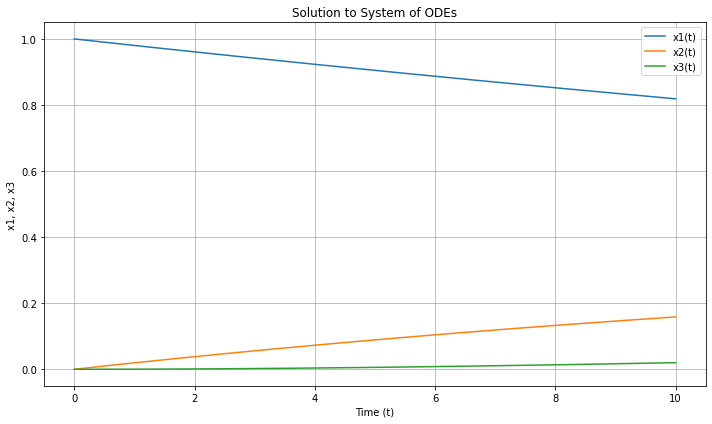

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

A = np.array([
    [-1/50, 0, 0],
    [1/50, -2/75, 0],
    [0, 2/75, -1/25]
])

print("Matrix A:")
print(A)

eig_vals, eig_vecs = np.linalg.eig(A)
print("\nEigenvalues:")
print(eig_vals)
print("\nEigenvectors:")
print(eig_vecs)

V = eig_vecs
D = np.diag(eig_vals)
V_inv = np.linalg.inv(V)
check_diag = V_inv @ A @ V
print("\nV^-1 * A * V (should be diagonal):")
print(check_diag)

def system(t, x):
    return A @ x

x0 = np.array([1, 0, 0])

t_span = (0, 10)
t_vals = np.linspace(t_span[0], t_span[1], 300)

sol = solve_ivp(system, t_span, x0, t_eval=t_vals)

plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='x1(t)')
plt.plot(sol.t, sol.y[1], label='x2(t)')
plt.plot(sol.t, sol.y[2], label='x3(t)')
plt.title('Solution to System of ODEs')
plt.xlabel('Time (t)')
plt.ylabel('x1, x2, x3')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
